# Roots of Equations
Finding roots of an equation can be defined as follows:

Given $f(x)$, to find $x$ such that $f(x) = 0$

## Application
Consider a simply supported beam subjected to a linearly varying load applied over the entire span.

<img src="ssbeam_uvl.jpg" width=600px />

### Input Data
Let the span of the simply supported beam be $L$. The intensity of load at the left support and right support be $w_1$ and $w_2$, respectively.

### Output Data
We must determine the following:
1. Reactions $R_a$ and $R_b$, at the left and right support, respectively.
2. Distribution of shear force and bending moment along the span of the beam
3. Location and magnitude of the maximum bending moment

### Reactions
To find the reactions, we must determine magnitude and point of action of the resultant of the linearly varying load. The necessary equations are given below:
$$\begin{align*}
P & = \frac{w_1 + w_2}{2} \, L \\
d & = \frac{2 \, w_2 + w_1}{w_1 + w_2} \, \frac{L}{3} \\
R_b & = \frac{1}{L} \, \frac{w_1 + w_2}{2} \, L \, \frac{2 \, w_2 + w_1}{w_1 + w_2} \, \frac{L}{3} = \frac{(2 w_2 + w_1) \, L}{6} \\
R_a & = \frac{(2 w_1 + w_2) \, L}{6}
\end{align*}
$$

### Shear Force and Bending Moment
$$\begin{align*}
w_x & = w_1 + \frac{w_2 - w_1}{L} \, x \\
W_x & = \frac{w_1 + w_x}{2} \, x = w_1 \, x + \frac{w_2  -w_1}{2L} \, x^2 \\
\bar{x} & = \frac{2w_1 + w_x}{w_1 + w_x} \, \frac{x}{3} \\
V_x & = R_a - W_x \\
M_x & = R_a \, x - W_x \, \bar{x}
\end{align*}
$$

### Maximum Bending Moment
Bending moment is maximum at the location where shear force undergoes change of sign, that is, where shear force is zero.

Reactions Ra = 20.0 Rb = 40.0
20.0
60.0


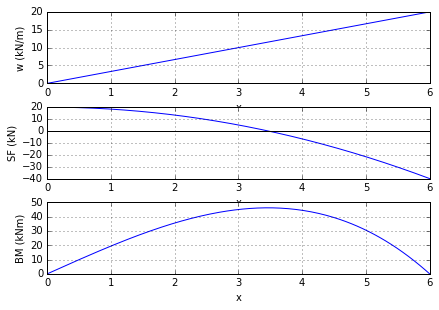

0 0.0 20.0 0.0
1 0.6 19.4 0.599985
2 1.2 17.6 1.19988
3 1.8 14.6 1.799595
4 2.4 10.4 2.39904
5 3.0 5.0 2.998125
6 3.6 -1.6 3.59676
7 4.2 -9.4 4.194855
8 4.8 -18.4 4.79232
9 5.4 -28.6 5.389065
10 6.0 -40.0 5.985
At x = 3.4 Vx = 0.733333333333
At x = 3.5 Vx = -0.416666666667


In [24]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w1 = 0.0
w2 = 20.0
L = 6.0
Ra = (2*w1 + w2) * L / 6.0
Rb = (2*w2 + w1) * L / 6.0
print('Reactions Ra =', Ra, 'Rb =', Rb)

def get_wx(x, w1, w2, L):
    return w1 + (w2 - w1) * x / L
print(get_wx(6.0, 0.0, 20.0, 6.0))

def get_Wx(x, w1, w2, L):
    wx = get_wx(x, w1, w2, L)
    return (w1 + wx) * x / 2.0
print(get_Wx(6.0, 0.0, 20.0, 6.0))

def get_xbar(x, w1, w2, L):
    wx = get_wx(x, w1, w2, L)
    if wx == 0:
        return 0.0
    else:
        return (2*w1 + wx) / (w1 + wx) * x / 3.0

def get_Vx(x, w1, w2, L, Ra):
    Wx = get_Wx(x, w1, w2, L)
    return Ra - Wx

def get_Mx(x, w1, w2, L, Ra):
    Wx = get_Wx(x, w1, w2, L)
    xbar = get_xbar(x, w1, w2, L)
    return Ra * x - Wx * xbar

x = np.linspace(0, L, 201)
wx = np.array([get_wx(xx, w1, w2, L) for xx in x])
Vx = np.array([get_Vx(xx, w1, w2, L, Ra) for xx in x])
Mx = np.array([get_Mx(xx, w1, w2, L, Ra) for xx in x])

plt.subplot(311)
plt.tight_layout()
plt.plot(x, wx)
plt.grid()
plt.xlabel('x')
plt.ylabel('w (kN/m)')

plt.subplot(312)
plt.plot(x, Vx)
plt.grid()
plt.axhline(0.0, color='k')
plt.xlabel('x')
plt.ylabel('SF (kN)')

plt.subplot(313)
plt.plot(x, Mx)
plt.grid()
plt.axhline(0.0, color='k')
plt.xlabel('x')
plt.ylabel('BM (kNm)')
plt.show()

x = np.linspace(0, L, 11)
Vx = np.array([get_Vx(xx, w1, w2, L, Ra) for xx in x])
for i in range(len(Vx)):
    print(i, x[i], Vx[i], Mx[i])

print('At x =', 3.4, 'Vx =', get_Vx(3.4, w1, w2, L, Ra))
print('At x =', 3.5, 'Vx =', get_Vx(3.5, w1, w2, L, Ra))

Having determine shear force and bending moment distribution, we must now determine $x$ where $V_x = 0$. From the graph of $V_x$ we can see that $x$ lies between 3 and 4. It appears to be close to $x=3.5$. In fact, we can see by calculating $V_x$ at $x=3.4$ and $x=3.5$ that it lies in between these two points. But this trial and error approach is tedious and time consuming.

Several numerical methods are available that can systematically determine a root of an equation once the root is bracketed. Two such methods are the **Bisection method** and the ^^False-position method**. We will explore these two methods independent of the application problem that we are trying to solve beore we come back to it.

Let us try and find the roots of 
$$f(x) = \sin 10x + \cos 3x = 0$$

A visual and intuitive way of finding the roots is to evaluate the function at close intervals and plot a graph of the function and see where it intersects with the x-axis.

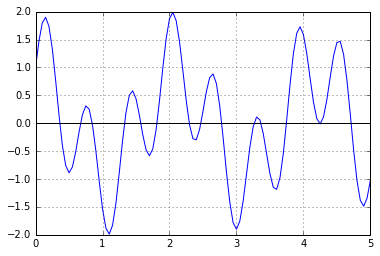

In [25]:
def f(x):
    return np.sin(10*x) + np.cos(3*x)

a = 0.0
b = 5.0
x = np.linspace(a, b, 101)
y = f(x)

plt.plot(x, y)
plt.grid()
plt.axhline(0, color='k')
plt.show()

We can see that there are three roots in the range $x = 0 \text{ to } 1$, three more between $x = 1 \text{ to } 2$, $x = 2 \text{ to } 3$, $x = 3 \text{ to } 4$ and what appears to be one or two between $x = 4 \text{ to } 5$. Bracketing is the operation of determining whether we are sure there is **at least one root** between two given values of $x$. This can be done by evaluating $f(x)$ at the two given values $x_1$ and $x_2$. If $f(x_1) \, f(x_2) < 0$, then there is at least one root between $x_1$ and $x_2$. Otherwise, we are not sure whether there are or there are no roots between the specified values.

In [26]:
x1 = 0.0
x2 = 1.0
print(f(x1) * f(x2))

x2 = 2.0
print(f(x1) * f(x2))

x2 = 0.5
print(f(x1) * f(x2))

-1.53401360749
1.87311553738
-0.888187072995


Let us divide a given range into short intervals and identify pairs of $x$ values which bracket a root. Let us take the range $x = 0 \text{ to } 5$ and divide it into 10 equal intervals. Then determine pairs of $x$ values that are assured to have at least one root between them.

In [27]:
a = 0.0
b = 5.0
n = 10
x = np.linspace(a, b, n+1)
y = f(x)
for xx, yy in zip(x, y):
    print("%12.6f %12.6f" % (xx, yy))

    0.000000     1.000000
    0.500000    -0.888187
    1.000000    -1.534014
    1.500000     0.439492
    2.000000     1.873116
    2.500000     0.214284
    3.000000    -1.899162
    3.500000    -0.903720
    4.000000     1.588967
    4.500000     1.445824
    5.000000    -1.022063


The values of $x$ that bracket a root are $(0, 0.5), (1.0, 1.5), (2.5, 3.0), (3.5, 4.0), (4.5, 5.0)$. From the graph it is obvious that there are roots in between other intervals, but we cannot conclude that by going at an interval of $0.5$.

In [28]:
def brackets(fn, a, b, n, **kwargs):
    brack = []
    x = np.linspace(a, b, n+1)
    y = fn(x)
    for xx, yy in zip(x, y):
        print("%8.2f %12.6f" %(xx, yy))

    for i in range(1, n+1):
        if y[i] * y[i-1] <= 0:
            brack.append((x[i-1], x[i]))
    return brack

brckts = brackets(f, a, b, 10)
print(brckts)

    0.00     1.000000
    0.50    -0.888187
    1.00    -1.534014
    1.50     0.439492
    2.00     1.873116
    2.50     0.214284
    3.00    -1.899162
    3.50    -0.903720
    4.00     1.588967
    4.50     1.445824
    5.00    -1.022063
[(0.0, 0.5), (1.0, 1.5), (2.5, 3.0), (3.5, 4.0), (4.5, 5.0)]


We can now take up one of these intervals and determine the root between them. Note that if the interval contains more than one bracket, we can only find one of them at a time.

## Bisection Method

1. Find the brackets within a given interval
2. Determine the root within the given brackets


In [29]:
a = 1.0
b = 1.5
if f(a) * f(b) < 0:
    print('Root is bracketed')
else:
    print('No roots are bracketed')

xm = (a + b) / 2.0

if f(a) * f(xm) < 0:
    print('Root lies between a and xm. Discard b')
    b = xm
else:
    print('Root lies between xm and b. Discard a')
    a = xm

xm = (a + b) / 2.0
print(a, f(a), b, f(b), xm, f(xm))

Root is bracketed
Root lies between xm and b. Discard a
1.25 -0.886881254691 1.5 0.439492040726 1.375 0.371792916316


We can successively halve the interval $(a, b)$ and eventually $|b - a| \approx 0$. We can stop when this difference is very small.

In [30]:
def bisection(fn, a, b, tol=1e-12, maxiter=100):
    y1 = fn(a)
    y2 = fn(b)
    if y1 * y2 > 0:
        print('Error: Root is not bracketed')
        return

    i = 0
    while i <= maxiter:
        if np.abs(y1) <= tol:
            print('Iterations:', i)
            return a
        elif np.abs(y2) <= tol:
            print('Iterations:', i)
            return b
        else:
            i += 1

            xm = (a + b) / 2.0
            ym = fn(xm)

            if np.abs(b - a) <= tol:
                print('Iterations:', i)
                return xm
            elif y1 * ym < 0:
                b = xm
                y2 = ym
            else:
                a = xm
                y1 = ym
    return

a = brckts[0][0]
b = brckts[0][1]
x = bisection(f, a, b)
print(x, f(x))

Iterations: 36
0.36249146003 3.66651153882e-13


## Improvements - False Position Method

Instead of selecting the mid-point of the interval $(a, b)$ as the next guess for the root, we can determine where a straight line joining the points $(x_1, y_1) \text{ and } (x_2, y_2)$ can be determined by linear interpolation and used as the next guess for the root.
$$
\begin{align*}
y_m &= y_1 + \frac{y_2 - y_1}{x_2 - x_1} (x_m - x_1) = 0 \\
\therefore \; x_m &= x_1 - \frac{x_2 - x_1}{y_2 - y_1} y_1
\end{align*}
$$

In [31]:
def false_position(fn, a, b, tol=1e-12, maxiter=100, **kwargs):
    print('False-Position Method')
    y1 = fn(a, **kwargs)
    y2 = fn(b, **kwargs)
    print(a, y1, b, y2)
    if y1 * y2 > 0:
        print('Root must be bracketed')
        return

    i = 0
    while i <= maxiter:
        if np.abs(y1) <= tol:
            print('Iterations:', i)
            return a
        elif np.abs(y2) <= tol:
            print('Iterations:', i)
            return b
        else:
            i += 1

            xm = a - (b - a) / (y2 - y1) * y1
            ym = fn(xm, **kwargs)

            if np.abs(b - a) <= tol:
                print('Iterations:', i)
                return xm
            elif y1 * ym < 0:
                b = xm
                y2 = ym
            else:
                a = xm
                y1 = ym
    return

a = brckts[0][0]
b = brckts[0][1]
x = false_position(f, a, b)
print(x, f(x))

False-Position Method
0.0 1.0 0.5 -0.888187072995
Iterations: 11
0.36249146003 -4.58910687229e-13


In [32]:
x = false_position(get_Vx, a=3.0, b=3.6, w1=0.0, w2=20.0, L=6.0, Ra=Ra)
print 'x =', x, 'Vx =', get_Vx(x, w1, w2, L, Ra)
print 'x =', x, 'Mmax =', get_Mx(x, w1, w2, L, Ra)

SyntaxError: invalid syntax (<ipython-input-32-339e127fbba4>, line 2)

## Python Features Introduced in this Exercise
### Generators
Generators are a way of generating a list by processing each element of a list in an implicit loop. Consider this situation. You have a list or an array of numbers. You want to generate another list/array wherein each number in this new list/array is a function of the corresponding number in the given list/array. The usual way to do this is to use a **`for`** loop. But this is not necessary in the case of an array as NumPy does looping implicitly. But this implicit looping in NumPy does not work when the function involves a boolean check. This forces us to use a **`for`** loop. The following two are equivalent:

In [ ]:
x = np.linspace(0, 5, 6)
print type(x), x

# NumPy arrays loop automatically
y = 2 * x
print type(y), y

# We can use a for loop, but we must first create a new array to store the results
y1 = np.zeros_like(x)
for i in range(len(x)):
    y1[i] = 2*x[i]
print type(y1), y1

# Generators remove the need to cre
y1 = [2*xx for xx in x]
print type(y1), y1

def func(x):
    if x <= 2:
        return 2*x
    else:
        return 10*x

# NumPy array automatic looping fails when function has a boolean statement
# This fails
#y3 = func(x)

# But this works
y3 = [func(xx) for xx in x]
print type(y3), y3

y4 = np.array([func(xx) for xx in x])
print type(y4), y4

### Subplots
Subplots allow us to plot multiple graphs within the same graphic window, by imaginarily splitting it into cells and directing the output of the next **`plot()`** command to a specific cell. For example, **`plt.subplot(324)`** splits the graphic windows into 3 rows and 2 columns and chooses the 4th cell as the target for the next **`plt.plot()`** command. Cells are counted row-wise, starting from first row and first column as cell number 1.

The advantage of using **`subplot()`** is that length of the axes are made equal and graphs are neatly aligned.
## References
1. Chapra, S.C., _Applied Numerical Methods with MATLAB for Engineers and Scientists_, 3ed., McGraw Hill, 2008.
2. Kiusalaas, J., _Numerical Methods in Engineering with Python_, Cambridge University Press, 2005.

In [ ]:
from __future__ import division, print_function
from numpy import inf
import numpy as np

def f(x):
    return x*x - 3*x + 1

def fd(x):
    return 2*x - 3

def f1(x):
    return np.sin(10*x) + np.cos(3*x)

def f1d(x):
    return 10.0*np.cos(10.0*x) - 3.0*np.sin(3.0*x)

def inc_search(f, x0, xn, nint, maxcount=inf):
    dx = (xn - x0) / nint
    x1 = x0; x2 = x1 + dx; y1 = f(x1); y2 = f(x2)
    b = []
    count = 0

    while x2 < xn and count < maxcount:
        if y1 * y2 <= 0:
            b.append([x1, x2])
            count += 1
        x1 = x2; x2 = x1 + dx; y1 = f(x1); y2 = f(x2)
    return b

print(inc_search(f, 0, 10, 5))
print(inc_search(f1, 3, 6, 12))

## Open Methods
### Newton - Raphson Method
$$x_{i+1} = x_i - \frac{y_i}{f'(x_i)}
$$

In [ ]:
def newton_raphson(f, fd, x, tol=1e-6, maxiter=30):
    y = f(x)
    yd = fd(x)
    k = 0
    if abs(y) <= tol:
        return x, k
    while abs(y) > tol and k < maxiter:
        k += 1
        x = x - y / yd
        y = f(x)
        yd = fd(x)
        print("%5d [%10.6f %10.6f] %10.6f" % (k, x, y, yd))
    if abs(y) <= tol:
        return x, k
    else:
        return None, k

x, k = newton_raphson(f, fd, 3.0, 1e-3)
print("Iterations =", k, "Root =", x, "Function =", f(x))

In [ ]:
x, k = newton_raphson(f, fd, 3.75)
print("Iterations =", k, "Root =", x, "Function =", f(x))

### Secant Method
\begin{align*}
  y &= y_1 + \frac{y_2 - y_2}{x_2 - x_1} \left( x - x_1 \right) = 0 \\
  x &= x_1 - \frac{x_2 - x_1}{y_2 - y_1} y_1
\end{align*}

In [ ]:
def secant(f, x1, x2, tol=1e-6, maxiter=30):
    y1 = f(x1); y2 = f(x2)
    xnew = x1 - (x2 - x1) / (y2 - y1) * y1
    ynew = f(xnew)
    k = 1
    print("%5d [%10.6f %10.6f] [%10.6f %10.6f] [%10.6f %10.6f]" % (k, x1, y1, x2, y2, xnew, ynew))
    if abs(ynew) <= tol:
        return xnew, k

    while abs(ynew) > tol and k < maxiter:
        k += 1
        x1 = x2; y1 = y2
        x2 = xnew; y2 = ynew
        xnew = x1 - (x2 - x1) / (y2 - y1) * y1
        ynew = f(xnew)
        print("%5d [%10.6f %10.6f] [%10.6f %10.6f] [%10.6f %10.6f]" % (k, x1, y1, x2, y2, xnew, ynew))
    if abs(ynew) <= tol:
        return xnew, k
    else:
        return None, k

x, k = secant(f, 0.0, 0.5)
print("Iterations =", k, "Root =", x, "Function =", f(x))

In [ ]:
x, k = secant(f, 2.5, 3.0)
print("Iterations =", k, "Root =", x, "Function =", f(x))

In [ ]:
def func(x):
    return np.sin(10.0*x) + np.cos(3.0*x)

x, k = false_position(func, 12, 16, 1e-2, 50)
print("Iterations =", k, "Root = ", x, func(x))